In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector



db= mysql.connector.connect(host="localhost",
                            username= "root", 
                            password= "12345",
                            database="ecommerce")
cur=db.cursor()

# 1. List all unique cities where customers are located.


In [2]:
# Execute the query
query = """SELECT DISTINCT customer_city FROM customers"""
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create the DataFrame
df = pd.DataFrame(data, columns=["City"])

# Display the DataFrame
print(df.head())

                    City
0                 franca
1  sao bernardo do campo
2              sao paulo
3        mogi das cruzes
4               campinas


# 2. Count the number of orders placed in 2017.


In [13]:
query= """select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data= cur.fetchall()
"Total orders are placed in 2017 are ", data[0][0]

('Total orders are placed in 2017 are ', 90202)

# 3. Find the total sales per category.


In [21]:

# Execute the query
query = """SELECT upper(products.product_category)AS category, 
       ROUND(SUM(payments.payment_value), 2) AS total_payment
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category;
 """
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create the DataFrame
df = pd.DataFrame(data, columns=['Category', 'Sales'])

# Display the DataFrame
print(df)


                        Category        Sales
0                      PERFUMERY   4053909.28
1           FURNITURE DECORATION  11441411.13
2                      TELEPHONY   3895056.41
3   FASHION BAGS AND ACCESSORIES   1745266.24
4                 BED TABLE BATH  13700429.37
..                           ...          ...
69                CDS MUSIC DVDS      9595.44
70                    LA CUISINE     23308.24
71   FASHION CHILDREN'S CLOTHING      6285.36
72                      PC GAMER     17395.44
73        INSURANCE AND SERVICES      2596.08

[74 rows x 2 columns]


# 4. Calculate the percentage of orders that were paid in installments.


In [3]:

# Execute the query
query = """SELECT sum(case when payment_installments>=1 then 1 else 0 end)/count(*)*100 from payments  
 """
cur.execute(query)

# Fetch the data
data = cur.fetchall()

data

[(Decimal('99.9981'),)]

# 5. Count the number of customers from each state. 


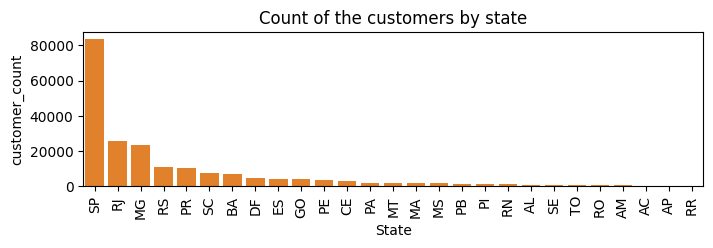

In [4]:
# Execute the query
query = """SELECT customer_state, COUNT(customer_id) 
           FROM customers 
           GROUP BY customer_state"""
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create the DataFrame
df = pd.DataFrame(data, columns=["State", "customer_count"])
df=df.sort_values(by="customer_count", ascending= False)
plt.figure(figsize= (8,2))
plt.bar(df["State"],df["customer_count"])
plt.xticks(rotation= 90)
sns.barplot(x="State", y="customer_count", data=df)
plt.title("Count of the customers by state")
plt.show()
    

# Intermediate Queries
# 1. Calculate the number of orders per month in 2018.


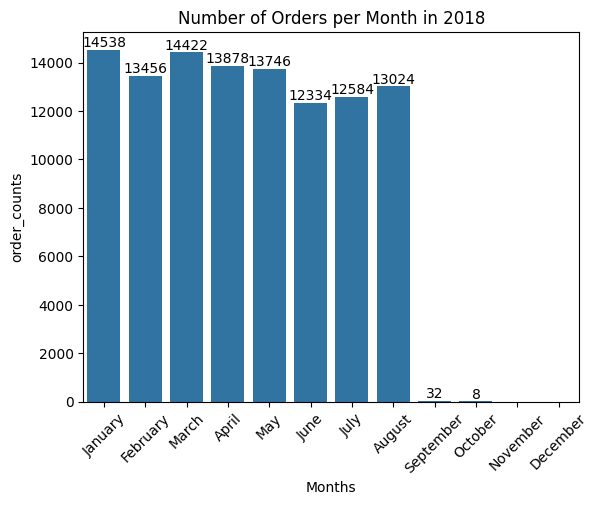

In [5]:
query = """SELECT MONTHNAME(order_purchase_timestamp) AS months, 
                  COUNT(order_id) AS order_count
           FROM orders
           WHERE YEAR(order_purchase_timestamp) = 2018
           GROUP BY months;
 """
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create the DataFrame
df = pd.DataFrame(data, columns=["Months", "order_counts"])

# Specify the correct order of months
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]

# Create the bar plot
ax= sns.barplot(x="Months", y="order_counts", data=df, order=months_order)

# Show the plot
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.title("Number of Orders per Month in 2018")
ax.bar_label(ax.containers[0])
plt.show()

# 2. Find the average number of products per order, grouped by customer city.


In [30]:

# Execute the query
query = """SELECT customers.customer_city, 
       ROUND(AVG(order_items.product_count), 2) AS average_products_per_order
FROM customers
JOIN orders ON customers.customer_id = orders.customer_id
JOIN (
    SELECT order_id, COUNT(*) AS product_count
    FROM order_items
    GROUP BY order_id
) AS order_items ON orders.order_id = order_items.order_id
GROUP BY customers.customer_city

 """
cur.execute(query)

# Fetch the data
data = cur.fetchall()
df = pd.DataFrame(data, columns=['customer_city', 'average_products_per_order'])


print(df.head(10))

           customer_city average_products_per_order
0              sao paulo                       2.31
1                   bage                       2.10
2                 macapa                       2.30
3          sao vendelino                       2.00
4     sao caetano do sul                       2.22
5   sao francisco do sul                       2.47
6   frederico westphalen                       2.14
7        coronel joao sa                       2.00
8           campo grande                       2.29
9  sao bernardo do campo                       2.28


# 3. Calculate the percentage of total revenue contributed by each product category.


In [12]:

# Execute the query
query = """SELECT 
    UPPER(products.product_category) AS category,
    ROUND((SUM(payments.payment_value) / (SELECT 
                    SUM(payment_value)
                FROM
                    payments)) * 100,
            2) AS sales_percentage
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
        JOIN
    payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category
ORDER BY sales_percentage DESC"""

cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create the DataFrame
df = pd.DataFrame(data, columns=['Category', 'percentage_distribution'])

# Display the DataFrame
print(df.head(5))


               Category  percentage_distribution
0        BED TABLE BATH                    42.79
1         HEALTH BEAUTY                    41.41
2  COMPUTER ACCESSORIES                    39.61
3  FURNITURE DECORATION                    35.73
4       WATCHES PRESENT                    35.71


# 4. Identify the correlation between product price and the number of times a product has been purchased.


In [20]:
import numpy as np 
query="""SELECT 
    products.product_category, COUNT(order_items.product_id),round(avg(order_items.price),2)
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
    group by products.product_category """
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create the DataFrame
df = pd.DataFrame(data, columns=['Category', 'order_count','price'])
# Display the DataFrame
arr1= df["order_count"]
arr2=df["price"]
np.corrcoef([arr1,arr2])
      
       


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 5. Calculate the total revenue generated by each seller, and rank them by revenue.


                          Seller_ID  Total_Revenue  Rank
0  7c67e1448b00f6e969d365cea6b010ab   2.028668e+06     1
1  1025f0e2d44d7041d6cf58b6550e0bfa   1.232888e+06     2
2  4a3ca9315b744ce9f8e9374361493884   1.204981e+06     3
3  1f50f920176fa81dab994f9023523100   1.161014e+06     4
4  53243585a1d6dc2643021fd1853d8905   1.139612e+06     5


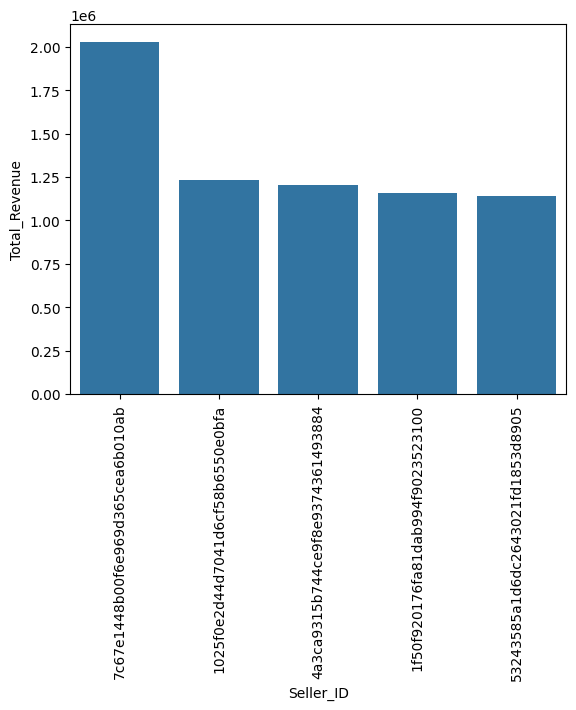

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Execute the SQL query
query = """SELECT *, 
    DENSE_RANK() OVER(ORDER BY total_revenue DESC) AS rn
FROM
    (SELECT 
        order_items.seller_id, 
        SUM(payments.payment_value) AS total_revenue
    FROM
        order_items 
    JOIN
        payments ON order_items.order_id = payments.order_id
    GROUP BY 
        order_items.seller_id) AS a;
 """
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create the DataFrame
df = pd.DataFrame(data, columns=['Seller_ID', 'Total_Revenue', 'Rank'])

# Display the top 5 rows
print(df.head(5))

# Slice the DataFrame to get only the top 5 sellers
df_top5 = df.head(5)

# Plotting the barplot for top 5 sellers
sns.barplot(x="Seller_ID", y="Total_Revenue", data=df_top5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()


# Advanced Queries
# 1. Calculate the moving average of order values for each customer over their order history.


In [5]:
query = """
SELECT customer_id, order_purchase_timestamp, payment, 
       AVG(payment) OVER (PARTITION BY customer_id 
                          ORDER BY order_purchase_timestamp 
                          ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS mov_avg 
FROM 
  (SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value AS payment 
   FROM payments 
   JOIN orders ON orders.order_id = payments.order_id) AS a
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Define column names based on the query
columns = ['customer_id', 'order_purchase_timestamp', 'payment', 'mov_avg']

# Convert the fetched data into a DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df.head(10))


                        customer_id order_purchase_timestamp  payment  \
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
1  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
2  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
3  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
4  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32    67.41   
5  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32    67.41   
6  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32    67.41   
7  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32    67.41   
8  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43   195.42   
9  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43   195.42   

      mov_avg  
0  114.739998  
1  114.739998  
2  114.739998  
3  114.739998  
4   67.410004  
5   67.410004  
6   67.410004  
7   67.410004  
8  195.419998  
9  195.419998  


# 2. Calculate the cumulative sales per month for each year.


In [7]:
query=""" select years, months, payment, sum(payment) over (order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp)as years, month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments on payments.order_id = orders.order_id
group by years, months
order by years,months) as a """
# Execute the query
cur.execute(query)
data = cur.fetchall()

# Define column names based on the query
columns = ['customer_id', 'order_purchase_timestamp', 'payment', 'mov_avg']

# Convert the fetched data into a DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df)


    customer_id  order_purchase_timestamp     payment      mov_avg
0          2016                         9     1008.96      1008.96
1          2016                        10   236361.92    237370.88
2          2016                        12       78.48    237449.36
3          2017                         1   553952.16    791401.52
4          2017                         2  1167632.04   1959033.56
5          2017                         3  1799454.40   3758487.96
6          2017                         4  1671152.12   5429640.08
7          2017                         5  2371675.28   7801315.36
8          2017                         6  2045105.52   9846420.88
9          2017                         7  2369531.68  12215952.56
10         2017                         8  2697585.28  14913537.84
11         2017                         9  2911049.80  17824587.64
12         2017                        10  3118711.52  20943299.16
13         2017                        11  4779531.20  2572283

# 3. Calculate the year-over-year growth rate of total sales.


In [18]:
query = """
WITH a AS (
    SELECT YEAR(orders.order_purchase_timestamp) AS years, 
           ROUND(SUM(payments.payment_value), 2) AS payment 
    FROM orders 
    JOIN payments ON payments.order_id = orders.order_id
    GROUP BY years
    ORDER BY years
)
SELECT years, 
       ((payment - LAG(payment, 1) OVER (ORDER BY years)) / LAG(payment, 1) OVER (ORDER BY years)) * 100 AS previous_year 
FROM a
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Create a DataFrame with the correct column names
df = pd.DataFrame(data, columns=["years", "yoy % growth"])

# Print the DataFrame
print(df)


   years  yoy % growth
0   2016           NaN
1   2017  12112.703757
2   2018     20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [8]:
query=  """WITH A AS (
    SELECT 
        customers.customer_id, 
        MIN(orders.order_purchase_timestamp) AS first_purchase
    FROM 
        customers
    JOIN 
        orders ON customers.customer_id = orders.customer_id
    GROUP BY 
        customers.customer_id
),
 
B AS (
    SELECT 
        A.customer_id,
        COUNT(DISTINCT orders.order_purchase_timestamp) AS second_purchase_count
    FROM 
        A
    JOIN 
        orders ON orders.customer_id = A.customer_id 
    WHERE 
        orders.order_purchase_timestamp > A.first_purchase
        AND orders.order_purchase_timestamp < DATE_ADD(A.first_purchase, INTERVAL 6 MONTH)
    GROUP BY 
        A.customer_id
)
    
SELECT 
    (COUNT(DISTINCT A.customer_id) * 100.0) / COUNT(DISTINCT B.customer_id) AS retention_rate
FROM 
    A
LEFT JOIN 
    B ON A.customer_id = B.customer_id;
"""


# Execute the query
cur.execute(query)
data = cur.fetchall()
data

[(None,)]

# 5. Identify the top 3 customers who spent the most money in each year.

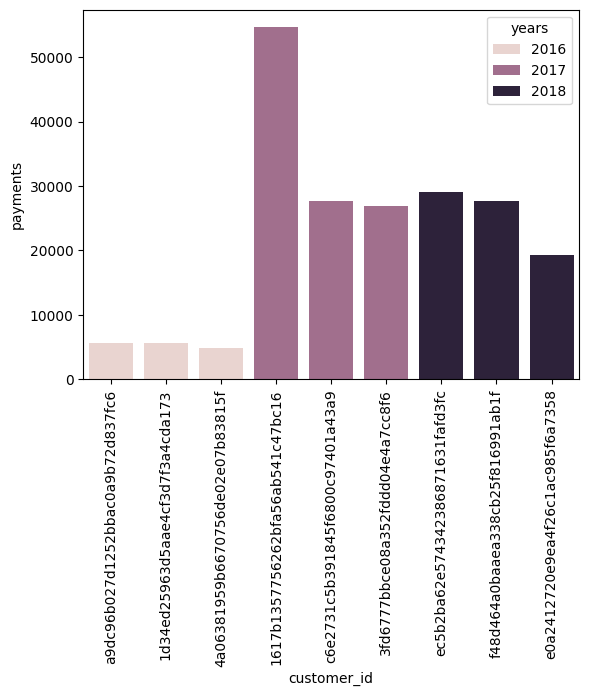

In [15]:
query = """ 
    SELECT 
        years, 
        customer_id, 
        d_rank, 
        payments
    FROM (
        SELECT 
            YEAR(orders.order_purchase_timestamp) AS years,
            orders.customer_id,
            SUM(payments.payment_value) AS payments,
            DENSE_RANK() OVER (PARTITION BY YEAR(orders.order_purchase_timestamp) 
                               ORDER BY SUM(payments.payment_value) DESC) AS d_rank
        FROM 
            orders 
        JOIN 
            payments ON payments.order_id = orders.order_id
        GROUP BY 
            YEAR(orders.order_purchase_timestamp), 
            orders.customer_id
    ) ranked_customers
    WHERE d_rank <= 3;
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Define the column names
columns = ['years', 'customer_id', 'rank', 'payments']

# Convert the result into a DataFrame
df = pd.DataFrame(data, columns=columns)

sns.barplot(x='customer_id',y= 'payments', data=df, hue= 'years')
plt.xticks (rotation= 90)
plt.show()
